In [1]:
import numpy as np
from scipy.io import loadmat 
import os
import glob
from scipy import interpolate

In [2]:
#saliency_data = loadmat('../gbvs_saliency_gaze_pos.mat')
saliency_data = loadmat('../preprocessed_data/gbvs_gaze_N2010_results.mat', simplify_cells=True)

In [3]:
saliency_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'gbvs_res'])

In [4]:
sal_gaze = saliency_data["gbvs_res"]
#sal_gaze = saliency_data["sal_gaze"]

In [5]:
sal_gaze.keys()

dict_keys(['All', 'Intensity', 'Orientation', 'Contrast', 'Flicker', 'Motion', 'DKL_Color'])

In [6]:
labels = ['All', 'Intensity', 'Orientation', 'Contrast', 'Flicker', 'Motion', 'DKL_Color']
#labels = ["Intensity", "Orientation", "Contrast", "Flicker", "Motion", "Color(DKL)", "All"]

In [7]:
sal_gaze = np.array([sal_gaze[l] for l in labels]).astype(float)
#sal_gaze = np.array([s[0] for s in sal_gaze])

In [8]:
blanks = np.hstack(
    [np.arange(140, 155), np.arange(311, 326), np.arange(538, 553), 
     np.arange(740, 772), np.arange(911, 926), np.arange(1094, 1123),
     np.arange(1319, 1334), np.arange(1651, 1666), np.arange(1835, 1850), 
     np.arange(1988, 2003), np.arange(2167, 2182), 2326])

In [9]:
sal_gaze[:, blanks, :] = np.nan

In [10]:
data_dict = {}
data_dict["labels"] = labels
data_dict["gaze_pos"] = sal_gaze

In [11]:
num_frames = 2327
num_sampling = 3883

In [12]:
time = np.linspace(0, 1.0, num_frames)
time_upsample = np.linspace(0, 1.0, num_sampling)

In [13]:
num_models = len(sal_gaze)

In [14]:
gaze_pos_upsample = np.zeros((num_models, num_sampling, 2))

In [15]:
for model_idx in range(num_models):
    for i in range(2): # x, y
        gp = sal_gaze[model_idx, :, i]
        f = interpolate.interp1d(time, gp, kind="nearest")
        gp_upsample = f(time_upsample) 
        gaze_pos_upsample[model_idx, :, i] = gp_upsample

In [16]:
data_dict["gaze_pos_upsample"] = gaze_pos_upsample

(0.0, 0.3)

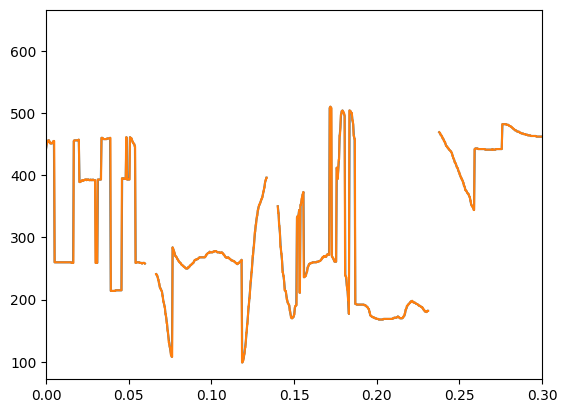

In [17]:
import matplotlib.pyplot as plt
plt.plot(time, sal_gaze[1,:,0])
plt.plot(time_upsample, gaze_pos_upsample[1,:,0])
plt.xlim(0, 0.3)

In [18]:
np.savez_compressed("../preprocessed_data/gbvs_gaze_pos.npz", **data_dict)